In [1]:
# Import packages required
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets,transforms
import numpy as np
from torch.autograd import Variable

In [2]:
transformers=transforms.Compose([
                        transforms.Resize((32, 32)),
                        transforms.ToTensor()])

In [3]:
def dataloader(train_bsize, test_bsize):
    train_dataloader=torch.utils.data.DataLoader(torchvision.datasets.MNIST(root='data',train=True,download=True,
                            transform=transformers),batch_size=train_bsize, shuffle=True)
    test_dataloader=torch.utils.data.DataLoader(torchvision.datasets.MNIST(root='data',train=False,download=True,
                            transform= transformers),batch_size=test_bsize, shuffle=True)
    return (train_dataloader,test_dataloader)


In [4]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1=nn.Conv2d(1,6,5)
        self.conv2=nn.Conv2d(6,16,5)
        self.linear1=nn.Linear(16*5*5,100)
        self.linear2=nn.Linear(100,60)
        self.linear3=nn.Linear(60,10)
        
    def forward(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(x.size()[0], -1)
        x=self.linear1(x)
        x=F.leaky_relu(x)
        x=self.linear2(x)
        x=F.leaky_relu(x)
        x=self.linear3(x)
        return x
    

In [5]:
def train_model(model,optimizer,loader,Floss):
    for b_index,(data,t) in enumerate(train_dataloader):
        #forward propagation
        optimizer.zero_grad()
        output=model(data)
        loss=Floss(output,t)
        loss.backward()
        optimizer.step()

In [6]:
def cal_loss_acc(model, loader, Floss):
    total_loss = 0
    loss_counter = 0
    correct_samples = 0
    total_samples = 0
    counter=0
    for batch in loader:
        data, target = batch
        pred = model(data)
        loss = Floss(pred, target)
        total_loss += loss.data.numpy()
        counter+=1
        for i, outputTensor in enumerate(pred):
                if torch.argmax(outputTensor) == target[i]:
                    correct_samples += 1
                total_samples += 1
    return total_loss/counter, round(correct_samples/total_samples,3)

In [7]:
def compute(model,learning_rate):
    train_loss_list=[]
    test_loss_list=[]
    train_acc_list=[]
    test_acc_list=[]
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, nesterov=True)
    epochs=20
    Floss = torch.nn.CrossEntropyLoss()
    for epoch in range(1, epochs + 1):
        train_model(model, optimizer, train_dataloader, Floss)
        train_loss, train_acc = cal_loss_acc(model, train_dataloader, Floss)
        test_loss, test_acc = cal_loss_acc(model, test_dataloader, Floss)
        train_loss_list.append(train_loss)
        test_loss_list.append(test_loss)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('epoch',epoch,'train loss',train_loss)
    return train_loss_list,test_loss_list,train_acc_list,test_acc_list

In [8]:
train_dataloader, test_dataloader= dataloader(400,400)
learning_rate1=0.01
model1=CNN()
b1_train_loss_list,b1_test_loss_list,b1_train_acc_list,b1_test_acc_list=compute(model1,learning_rate1)

train_dataloader1, test_dataloader1= dataloader(1024,1024)
model2=CNN()
b2_train_loss_list,b2_test_loss_list,b2_train_acc_list,b2_test_acc_list=compute(model2,learning_rate1)

[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.


epoch 1 train loss 0.5680355455478032
epoch 2 train loss 0.21689246227343878
epoch 3 train loss 0.13955897544821103
epoch 4 train loss 0.11086837559938431
epoch 5 train loss 0.08159988020857176
epoch 6 train loss 0.07366068430244922
epoch 7 train loss 0.0654813381905357
epoch 8 train loss 0.05562602873891592
epoch 9 train loss 0.05431673884391785
epoch 10 train loss 0.045979448643823466
epoch 11 train loss 0.04760754478474458
epoch 12 train loss 0.04354105523476998
epoch 13 train loss 0.038411064470807714
epoch 14 train loss 0.03464744580288728
epoch 15 train loss 0.030949767120182513
epoch 16 train loss 0.02938525891552369
epoch 17 train loss 0.026023007842401663
epoch 18 train loss 0.0248050814277182
epoch 19 train loss 0.02703656543046236
epoch 20 train loss 0.023030382956688602
epoch 1 train loss 2.275155750910441
epoch 2 train loss 0.3233788283665975
epoch 3 train loss 0.17251080378890038
epoch 4 train loss 0.11282967897752921
epoch 5 train loss 0.09047491764028867
epoch 6 train l

In [9]:
b1_params = torch.nn.utils.parameters_to_vector(model1.parameters())
b2_params = torch.nn.utils.parameters_to_vector(model2.parameters())

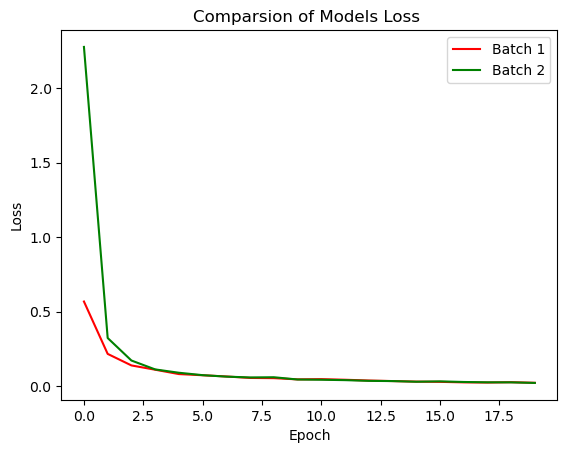

In [10]:
plt.plot(np.arange(0, 20, 1), b1_train_loss_list, color = "r")
plt.plot(np.arange(0, 20, 1), b2_train_loss_list, color = "g")
plt.title('Comparsion of Models Loss ')
plt.legend(['Batch 1', 'Batch 2'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

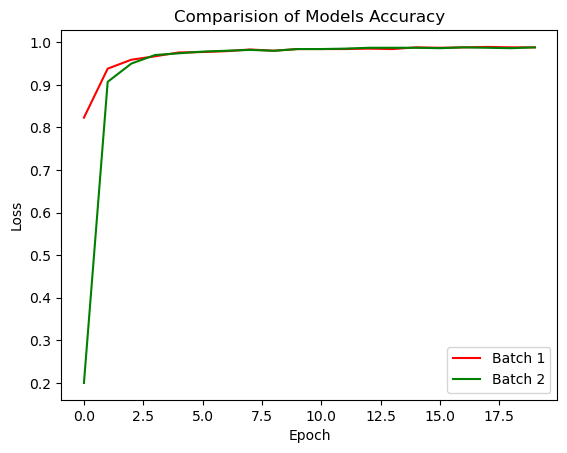

In [11]:
fig, ax = plt.subplots()
ax.plot(np.arange(0, 20, 1), b1_test_acc_list, color="r", label='Batch 1')
ax.plot(np.arange(0, 20, 1), b2_test_acc_list, color="g", label='Batch 2')
ax.set_title('Comparision of Models Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()

plt.show()


In [12]:
def cal_loss_aplha_model(alpha_val):
    alpha_train_loss_list = []
    alpha_test_loss_list = []
    alpha_train_acc_list = []
    alpha_test_acc_list = []
    counter=0
    for i in alpha_val:
        counter+=1
        theta_val=(1-i)*b1_params+i*b2_params
        model = CNN()
        torch.nn.utils.vector_to_parameters(theta_val, model.parameters())
        Floss = nn.CrossEntropyLoss()
        alpha_train_loss, alpha_train_acc = cal_loss_acc(model, train_dataloader, Floss)
        alpha_test_loss, alpha_test_acc = cal_loss_acc(model, test_dataloader, Floss)
        alpha_train_loss_list.append(alpha_train_loss)
        alpha_train_acc_list.append(alpha_train_acc)
        alpha_test_loss_list.append(alpha_test_loss)
        alpha_test_acc_list.append(alpha_test_acc)
        print('Count:',counter,' alpha_train_loss: ',alpha_train_loss)
    return alpha_train_loss_list,alpha_test_loss_list,alpha_train_acc_list,alpha_test_acc_list 

In [13]:
alpha_val=np.arange(-1.5,1.5,0.1)
alpha_train_loss_list,alpha_test_loss_list,alpha_train_acc_list,alpha_test_acc_list = cal_loss_aplha_model(alpha_val)

Count: 1  alpha_train_loss:  140.57647221883138
Count: 2  alpha_train_loss:  102.68547154744466
Count: 3  alpha_train_loss:  73.35170298258464
Count: 4  alpha_train_loss:  51.07509320576985
Count: 5  alpha_train_loss:  34.51979113260905
Count: 6  alpha_train_loss:  22.55051683425903
Count: 7  alpha_train_loss:  14.14645818710327
Count: 8  alpha_train_loss:  8.462379404703777
Count: 9  alpha_train_loss:  4.769446757634481
Count: 10  alpha_train_loss:  2.506888922055562
Count: 11  alpha_train_loss:  1.2078168344497682
Count: 12  alpha_train_loss:  0.5269427522023519
Count: 13  alpha_train_loss:  0.203598543976744
Count: 14  alpha_train_loss:  0.07247109623004992
Count: 15  alpha_train_loss:  0.028747127782553436
Count: 16  alpha_train_loss:  0.023030383332322043
Count: 17  alpha_train_loss:  0.052101309845844906
Count: 18  alpha_train_loss:  0.21787249793608984
Count: 19  alpha_train_loss:  0.765490468343099
Count: 20  alpha_train_loss:  1.532456549803416
Count: 21  alpha_train_loss:  1.

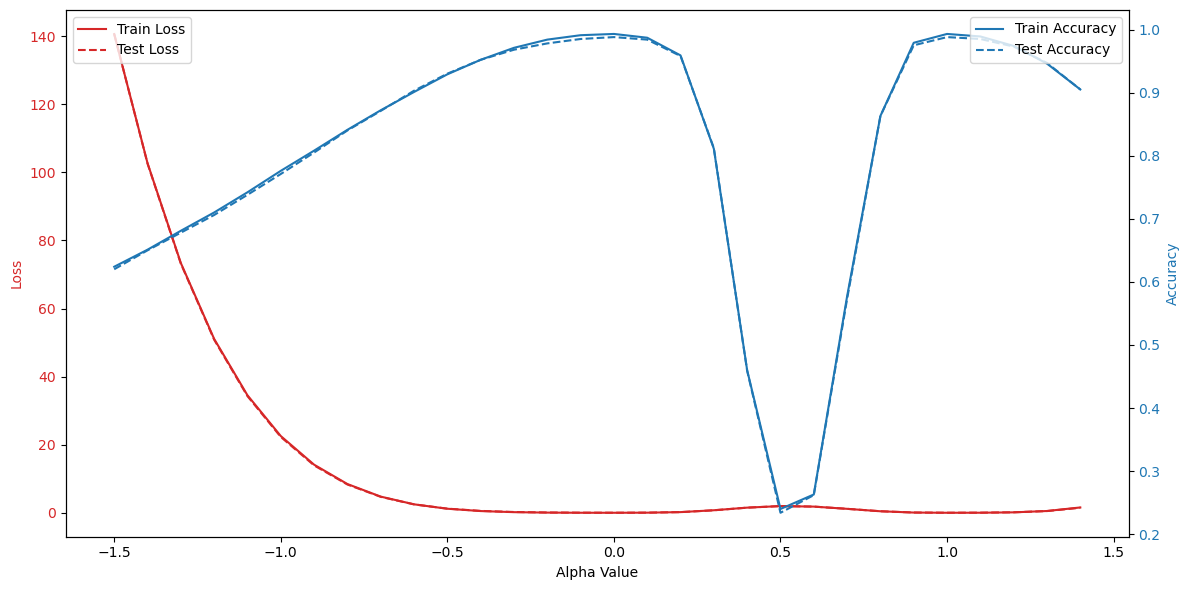

In [14]:


fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Alpha Value')
ax1.set_ylabel('Loss', color=color)
ax1.plot(alpha_val, alpha_train_loss_list, color=color, label='Train Loss')
ax1.plot(alpha_val, alpha_test_loss_list, color=color, linestyle='dashed', label='Test Loss')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)  
ax2.plot(alpha_val, alpha_train_acc_list, color=color, label='Train Accuracy')
ax2.plot(alpha_val, alpha_test_acc_list, color=color, linestyle='dashed', label='Test Accuracy')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()  
plt.show()


# LR=0.001

In [15]:
train_dataloader, test_dataloader= dataloader(64,64)
learning_rate1=0.001
model1=CNN()
b1_train_loss_list,b1_test_loss_list,b1_train_acc_list,b1_test_acc_list=compute(model1,learning_rate1)

train_dataloader, test_dataloader= dataloader(1024,1024)
model2=CNN()
b2_train_loss_list,b2_test_loss_list,b2_train_acc_list,b2_test_acc_list=compute(model2,learning_rate1)

epoch 1 train loss 2.225334825292071
epoch 2 train loss 0.3629945924064752
epoch 3 train loss 0.22652411642772302
epoch 4 train loss 0.15613732432950533
epoch 5 train loss 0.1314720300310202
epoch 6 train loss 0.09463514622126117
epoch 7 train loss 0.08507746460337216
epoch 8 train loss 0.07787468687428642
epoch 9 train loss 0.06737664441562204
epoch 10 train loss 0.06586787885557344
epoch 11 train loss 0.05995160364595526
epoch 12 train loss 0.058746751868970264
epoch 13 train loss 0.0561100765017729
epoch 14 train loss 0.05531513758936027
epoch 15 train loss 0.054373193177025214
epoch 16 train loss 0.0478835541032702
epoch 17 train loss 0.04431130792009833
epoch 18 train loss 0.041891104983178766
epoch 19 train loss 0.042193766973881934
epoch 20 train loss 0.037766294281143864
epoch 1 train loss 2.303231611090191
epoch 2 train loss 2.3005122774738376
epoch 3 train loss 2.297613152002884
epoch 4 train loss 2.294282149460356
epoch 5 train loss 2.290206864728766
epoch 6 train loss 2.284

In [16]:
b1_params = torch.nn.utils.parameters_to_vector(model1.parameters())
b2_params = torch.nn.utils.parameters_to_vector(model2.parameters())

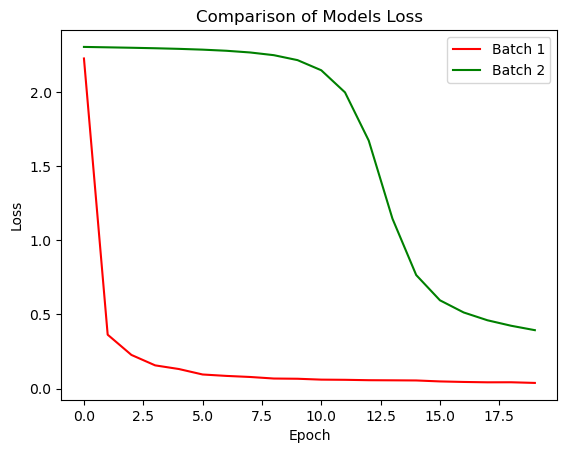

In [17]:
fig, ax = plt.subplots()

ax.plot(np.arange(0, 20, 1), b1_train_loss_list, color="r")
ax.plot(np.arange(0, 20, 1), b2_train_loss_list, color="g")

ax.set_title('Comparison of Models Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

ax.legend(['Batch 1', 'Batch 2'])

plt.show()

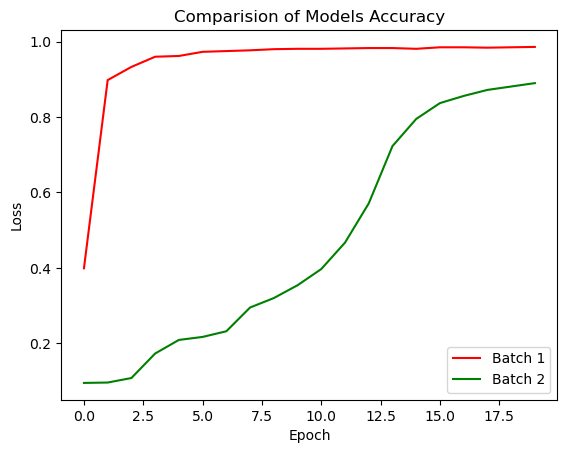

In [18]:
plt.plot(np.arange(0, 20, 1), b1_test_acc_list, color = "r")
plt.plot(np.arange(0, 20, 1), b2_test_acc_list, color = "g")
plt.title('Comparision of Models Accuracy')
plt.legend(['Batch 1', 'Batch 2'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [19]:
alpha_train_loss_list,alpha_test_loss_list,alpha_train_acc_list,alpha_test_acc_list = cal_loss_aplha_model(alpha_val)

Count: 1  alpha_train_loss:  21.2345606270483
Count: 2  alpha_train_loss:  15.9171530028521
Count: 3  alpha_train_loss:  11.758109512975661
Count: 4  alpha_train_loss:  8.49769547026036
Count: 5  alpha_train_loss:  6.038321587998988
Count: 6  alpha_train_loss:  4.18678744364593
Count: 7  alpha_train_loss:  2.8222652673721313
Count: 8  alpha_train_loss:  1.8530144469212677
Count: 9  alpha_train_loss:  1.1821344262462552
Count: 10  alpha_train_loss:  0.7299065034268266
Count: 11  alpha_train_loss:  0.4307033038240368
Count: 12  alpha_train_loss:  0.24417492166414098
Count: 13  alpha_train_loss:  0.13438470964714633
Count: 14  alpha_train_loss:  0.0731002784065776
Count: 15  alpha_train_loss:  0.04358098766435001
Count: 16  alpha_train_loss:  0.037736470006027464
Count: 17  alpha_train_loss:  0.07304841772479526
Count: 18  alpha_train_loss:  0.27866100709317093
Count: 19  alpha_train_loss:  0.8219309287556147
Count: 20  alpha_train_loss:  1.473946662272437
Count: 21  alpha_train_loss:  1.

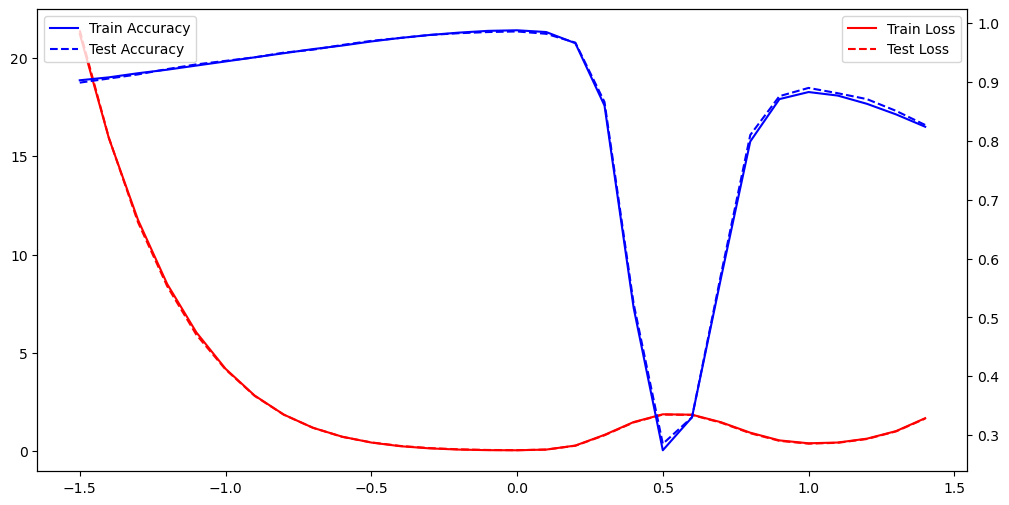

In [21]:

alpha_val=np.arange(-1.5,1.5,0.1)
plt.figure(figsize=(12,6))
plt.plot(alpha_val, alpha_train_loss_list, color = "r")
plt.plot(alpha_val, alpha_test_loss_list, color = "r",linestyle='dashed')
plt.legend(['Train Loss' , 'Test Loss'])

plt.twinx()

plt.plot(alpha_val, alpha_train_acc_list, color = "b")
plt.plot(alpha_val, alpha_test_acc_list, color = "b",linestyle='dashed')
plt.legend(['Train Accuracy' , 'Test Accuracy'],loc='upper left')